### **Case - Analista de Intelligence**

"No último ano, o XVendas apresentou perda gradual na rentabilidade. Sabe-se que o volume de vendas permaneceu estável durante o período.
O que pode ser a causa desse comportamento?"

Para analisarmos as causas da perda gradual de rentabilidade do XVendas precisamos encontrar nos dados disponibilizados, padrões e insights que consigam nos auxiliar a identificar os gatilhos que desenharam esse cenário para compania no último ano.

Essa análise consistirá em 3 etapas específicas:
1. Análise dos Dados e Estrutura das Variáveis;
2. Análise de Tendência das Variáveis
3. Aprofundamento nos Dados

### 1) Análise os Dados e Estrutura das Variáveis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importando Xls e fazendo validações de estrutura do arquivo:
def read_all_sheets_from_excel(path: str) -> dict:
    xls = pd.ExcelFile(path)
    df_dict = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}
    return df_dict

dataframes = read_all_sheets_from_excel('Case_Vaga_Analista_Intelligence.xlsx')

# printando o nome dos dataframes:
print('Dataframe keys of dataframes:' + ', '.join(dataframes.keys()))

for k, v in dataframes.items():
    # Checando se os nomes das colunas estão como str
    try:
        v = v.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
    except:
        pass

    # segmentando colunas com espaço em branco
    try:
        v = v.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
    except:
        pass
    dataframes[k] = v
    print('dataframe: '+ k)
    print(v.head())

df_case = v

Dataframe keys of dataframes:Plan1
dataframe: Plan1
   Mês           Categoria  Custo Entrega  Custo dos Produtos  Custo Marketing
0    1            AC AUDIO    80353.50458        36247.578746     11352.354514
1    1       AC BT SPEAKER    45448.46538        82168.278219     19423.724235
2    1      AC CALCULADORA     2253.74290         3309.124869       813.303043
3    1        AC CELULARES    22829.13170        18308.656441      5471.035672
4    1  AC ELETRODOMESTICO      432.07736           76.286501        33.111653


In [ ]:
# validando o tipo dos dados e nulos
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mês                 3521 non-null   int64  
 1   Categoria           3521 non-null   object 
 2   Custo Entrega       3521 non-null   float64
 3   Custo dos Produtos  3521 non-null   float64
 4   Custo Marketing     3521 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 137.7+ KB


### 2) Análise de Tendência das Variáveis

Uma vez que os dados estão distribuídos nos meses, podemos analisar a evolução das variáveis mês a **mês**:

<ipython-input-23-396ebeed3c29>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Mês', y='Custo Marketing', data=df_case, ci=None, marker='o', label='Marketing')
<ipython-input-23-396ebeed3c29>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Mês', y='Custo dos Produtos', data=df_case, ci=None, marker='o', color='r', label='Produto')
<ipython-input-23-396ebeed3c29>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Mês', y='Custo Entrega', data=df_case, ci=None, marker='o', color='g', label='Entrega')


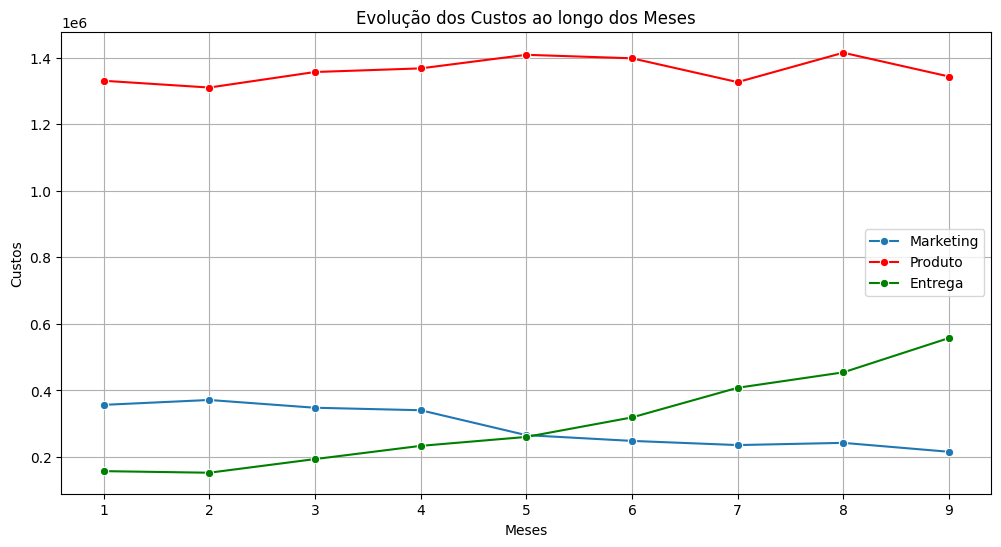

In [ ]:
# Plotando a tendência dos custos no último ano
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mês', y='Custo Marketing', data=df_case, ci=None, marker='o', label='Marketing')
sns.lineplot(x='Mês', y='Custo dos Produtos', data=df_case, ci=None, marker='o', color='r', label='Produto')
sns.lineplot(x='Mês', y='Custo Entrega', data=df_case, ci=None, marker='o', color='g', label='Entrega')
plt.title('Evolução dos Custos ao longo dos Meses')
plt.xlabel('Meses')
plt.ylabel('Custos')
plt.grid(True)
plt.show()

### Conclusão:
Observando o gráfico fica evidente que houve um aumento considerável no custo de entrega, em relação aos demais custos. Na verdade, o custo de produto se manteve no mesmo patamar durante os 9 meses, enquanto o custo de marketing por categoria diminuiu no período. Em contra partida, o custo de entrega segue uma tendência de aumento, mês contra mês conforme o gráfico

Levando em consideração que o volume de vendas se manteve estável nesse caso, entende-se que o aumento gradual do custo de entrega (a partir do 2° mês) impacta diretamente o lucro da cia e consequentemente a rentabilidade do XVendas é comprometida.  


O custo de entrega, geralmente é composto pelos custos logísticos e pode ser explicados pelas seguintes variáveis:

1. **Preços dos combustíveis:** Um aumento nos preços dos combustíveis, impacta diretamente a cadeia logística do XVendas. Quanto maior o preço do combustível, maior o valor do frete para entrega do produto.

2. **Mudanças nos custos trabalhistas:** Aumentos nos salários ou no pagamento de horas extras para os times logísticos durante períodos de pico ou devido à escassez de mão de obra devem aumentar os custos de entrega.

3. **Mudanças regulatórias:** Novas regulamentações ou impostos relacionados aos serviços de transporte e entrega, também podem contribuir para o aumento desse custo.

4. **Distribuição Geográfica:** Na tentativa de fomentar venda em regiões geográfica remotas, menos acessíveis ou até mesmo distantes dos CD's e lojas, o custo de frete tende a aumentar devido a distância percorrida para entrega.  
Exemplo: As regiões norte e nordeste correspondem, somadas, a mais de 63% do território brasileiro, transformando em um grande desafio a gestão de custo de entrega nessas regiões;


###3) Aprofundamento da Análise

Levando em consideração o aumento do custo de entrega, podemos entender melhor qual a correlação entre os custos, afim de capturar mais insights:

<ipython-input-28-b98b36bfe55d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df_case.corr()


<Axes: >

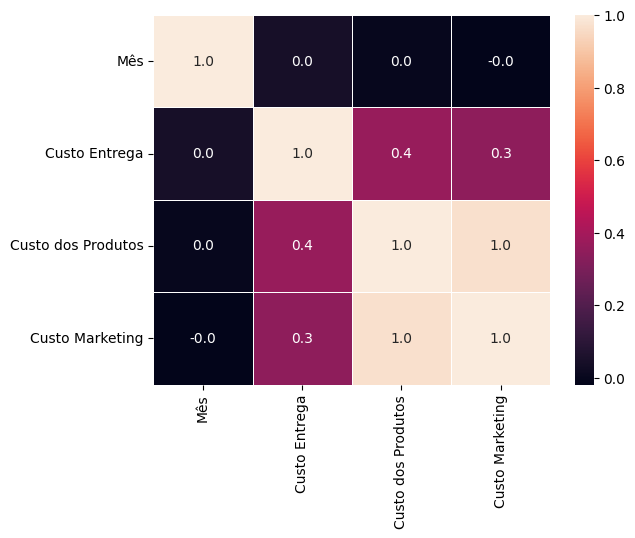

In [ ]:
correlacao = df_case.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

## Mapa de Correlação:
Este mapa térmico mostra os coeficientes de correlação entre cada par de variáveis, fornecendo insights sobre como esses custos estão relacionados entre si. Um coeficiente de correlação próximo de 1 indica uma forte correlação positiva, ou seja, à medida que uma variável aumenta, a outra tende a aumentar também. Um coeficiente próximo de -1 indica uma forte correlação negativa, onde uma variável aumenta enquanto a outra diminui. Um coeficiente em torno de 0 sugere não haver correlação linear entre as variáveis.


é possível observar que existe alguma correlação entre os custos:
* Custo de entrega / Custo de Produto = 0.4
* Custo de entrega / Custo de Marketing = 0.3

Detalhando melhor a base, podemos observar esse nível de correlação quando analisamos a média


In [ ]:
# Calculando a média de cada custo por categoria
df_media_custos = df_case.groupby('Categoria').mean()[['Custo Entrega', 'Custo dos Produtos','Custo Marketing']]

# Ordenando a média do maior para o menor
df_media_custos = df_media_custos.sort_values(by=['Custo Entrega', 'Custo dos Produtos','Custo Marketing'], ascending=False)

#resetando index
df_media_custos = df_media_custos.reset_index()

#formatando os números
df_media_custos['Custo Marketing'] = df_media_custos['Custo Marketing'].round(2)
df_media_custos['Custo dos Produtos'] = df_media_custos['Custo dos Produtos'].round(2)
df_media_custos['Custo Entrega'] = df_media_custos['Custo Entrega'].round(2)

#plotando a tabela
df_media_custos



,Categoria,Custo Entrega,Custo dos Produtos,Custo Marketing
0,TANQUINHO,19442394.95,37100915.31,7082558.93
1,CHURRASCO,8897384.62,91408.00,293266.77
2,SMARTPHONE,6076185.68,38948853.15,7683598.39
3,REFRIGERADOR,4705456.09,8058888.80,1883068.03
4,TV,4320326.76,17638929.13,3472717.45
...,...,...,...,...
410,PISCINA,37.85,26.82,11.77
411,ACESSÓRIOS TELEFONIA,33.19,24.64,6.91
412,ACESSORIOS NOTEBOOK,11.26,0.46,0.20
413,CAMERAS/FILMADORAS,0.08,0.23,0.07


## Conclusão:

Fica evidente que para categoria de produtos de maior custo, geralmente o custo de entrega é maior. Validando a correlação observada anteriormente. É interessante constatar que as categorias nas quais os produtos tem maior volumetria (m³), dominam o top 20 de maiores custo de entrega. Como uma das informações de precificação do frete é justamente a volumetria da caixa, fica claro como esta relação preço do produto > volumetria > custo > custo de frete também afeta o custo de entrega indiretamente. Podemos considerar que este como um outro fator que também impacta no aumento do custo de entrega.

##4) Conclusão Final:
Neste case podemos observar como a rentabilidade do XVendas foi afetada pelo aumento gradual do custo de entrega, que cresceu ao longo do ano como constatado no gráfico de tendência.

Automaticamente quando pensamos no custo de entrega, pensamos em fatores externos que estão, por vezes, fora do controle da área de supply como exemplifiquei na conclusão daquela etapa. Porém, quando analisamos mais profundamente os custos por categoria, podemos enxergar que também existem relações entre os próprios custos o que indica que fatores internos, intrínsecos ao próprio negócio, também podem afetar uma métrica decisiva indiretamente. Caso a compania assuma uma estratégia de aumento de rentabilidade, esse seria um ótimo ponto de partida para a gestão dos custos e consequentemente melhora da rentabilidade. Entender quais são os fatores internos que podem e devem ser governados para um melhor desempenho operacional!
